IMPORTING LIBRARIES

In [41]:
import tensorflow as tf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

DATA PREPROCESSING

Training image processing

In [42]:


training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3847 files belonging to 5 classes.


Validation image processing

In [43]:
import tensorflow as tf

validation_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3847 files belonging to 5 classes.


In [44]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [45]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[194.00279   162.00279    77.666855 ]
   [193.40121   158.40121    76.53999  ]
   [198.75734   166.4839     86.39406  ]
   ...
   [193.70087   168.30432    99.09149  ]
   [197.01059   168.84653   100.25668  ]
   [204.25824   176.13783   108.62474  ]]

  [[190.07202   157.07593    76.068115 ]
   [172.3553    136.3592     58.345215 ]
   [188.7628    156.48936    76.39952  ]
   ...
   [166.46416   142.7351     73.82495  ]
   [178.26073   151.5091     86.82713  ]
   [131.12408   103.701996   45.25647  ]]

  [[185.82173   153.48189    77.12251  ]
   [175.81215   146.28871    67.37465  ]
   [185.95467   157.11565    76.69531  ]
   ...
   [112.51172    87.704666   23.311676 ]
   [113.68178    84.757416   24.230072 ]
   [ 95.05327    69.20703    11.19046  ]]

  ...

  [[144.59978   132.59978    82.97478  ]
   [113.666885  102.29082    49.469086 ]
   [ 68.55139    56.991257    9.944275 ]
   ...
   [222.00104   194.00104   130.32135  ]
   [217.48474   189.48474   124.48474  ]
   [2

BULDING MODEL

In [46]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [47]:
model=Sequential()

Building convolution layer

In [48]:
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [49]:

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [50]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [51]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [52]:
model.add(Dropout(0.25))

In [53]:
model.add(Flatten())

In [54]:
model.add(Dense(units=2000,activation="relu"))

In [55]:
model.add(Dropout(0.4))

In [56]:
#output layer
model.add(Dense(units=5,activation='softmax'))






COMPILING MODEL


In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])




In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

Model Training


In [59]:
training_histroy=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
121/121 [==============================] - 193s 2s/step - loss: 1.4909 - accuracy: 0.6067 - val_loss: 0.5914 - val_accuracy: 0.7928
Epoch 2/10
121/121 [==============================] - 188s 2s/step - loss: 0.5297 - accuracy: 0.8063 - val_loss: 0.3563 - val_accuracy: 0.8578
Epoch 3/10
121/121 [==============================] - 190s 2s/step - loss: 0.3722 - accuracy: 0.8612 - val_loss: 0.3682 - val_accuracy: 0.8651
Epoch 4/10
121/121 [==============================] - 188s 2s/step - loss: 0.2847 - accuracy: 0.8989 - val_loss: 0.2626 - val_accuracy: 0.9036
Epoch 5/10
121/121 [==============================] - 183s 2s/step - loss: 0.2420 - accuracy: 0.9145 - val_loss: 0.1160 - val_accuracy: 0.9649
Epoch 6/10
121/121 [==============================] - 185s 2s/step - loss: 0.1977 - accuracy: 0.9301 - val_loss: 0.1577 - val_accuracy: 0.9506
Epoch 7/10
121/121 [==============================] - 181s 1s/step - loss: 0.1627 - accuracy: 0.9410 - val_loss: 0.1281 - val_accuracy: 0.9602

Model evoluvation

In [60]:
#evaluation of traning set
train_loss,train_acc=model.evaluate(training_set)

121/121 [==============================] - 26s 211ms/step - loss: 0.0180 - accuracy: 0.9971


In [61]:
#evaluation of validation set
val_loss,val_acc=model.evaluate(validation_set)

121/121 [==============================] - 26s 212ms/step - loss: 0.0180 - accuracy: 0.9971


Saving model 

In [62]:
model.save("Trained model.keras")
model.save("Trained model.h5")

In [63]:
training_histroy.history

{'loss': [1.4908627271652222,
  0.5296719670295715,
  0.372233122587204,
  0.2846980690956116,
  0.24204027652740479,
  0.1977035254240036,
  0.16267633438110352,
  0.14662475883960724,
  0.12320556491613388,
  0.07453684508800507],
 'accuracy': [0.6067065000534058,
  0.806342601776123,
  0.8611905574798584,
  0.898882269859314,
  0.9144788384437561,
  0.9300754070281982,
  0.9409930109977722,
  0.9508708119392395,
  0.9578892588615417,
  0.9760852456092834],
 'val_loss': [0.5913558602333069,
  0.3562512695789337,
  0.3682049810886383,
  0.2625599503517151,
  0.11604318022727966,
  0.1577177345752716,
  0.12806305289268494,
  0.06378664821386337,
  0.04361647367477417,
  0.017961297184228897],
 'val_accuracy': [0.7928255796432495,
  0.8578112721443176,
  0.8650896549224854,
  0.9035612344741821,
  0.964907705783844,
  0.950610876083374,
  0.9602287411689758,
  0.98570317029953,
  0.9864829778671265,
  0.997140645980835]}

In [64]:
import json
f=open("training.json",'w')
json.dump(training_histroy.history,f)

Accuration validation

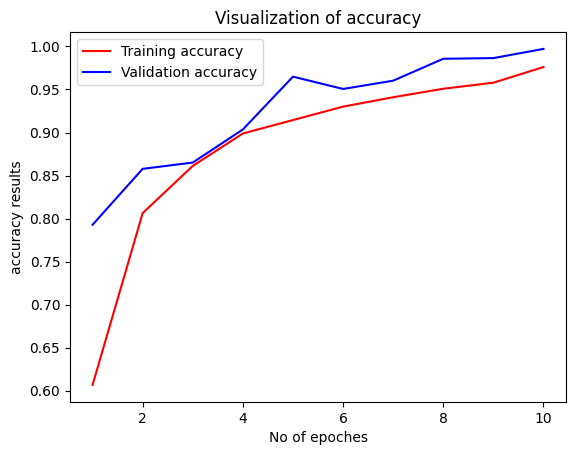

In [65]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_histroy.history['accuracy'],color='red',label='Training accuracy')
plt.plot(epochs,training_histroy.history['val_accuracy'],color='blue',label='Validation accuracy')
plt.xlabel("No of epoches")
plt.ylabel("accuracy results")
plt.title("Visualization of accuracy")
plt.legend()
plt.show()

In [66]:
class_name=validation_set.class_names
class_name

['Brown_Rust', 'Healthy', 'Loose_Smut', 'Septoria', 'Yellow_Rust']

In [69]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 987 files belonging to 5 classes.


In [70]:
y_predit=model.predict(test_set)
y_predit,y_predit.shape

31/31 [==============================] - 7s 214ms/step


(array([[9.9999321e-01, 4.8779032e-12, 6.8450290e-06, 3.3870740e-10,
         7.8296375e-10],
        [9.9992323e-01, 2.9497824e-11, 7.6773591e-05, 6.1649188e-09,
         1.8219584e-08],
        [9.9995255e-01, 1.5857291e-08, 4.6518697e-05, 2.9529036e-07,
         6.5001717e-07],
        ...,
        [1.2934031e-01, 6.5967788e-06, 2.7461350e-03, 5.3078271e-05,
         8.6785388e-01],
        [7.0040971e-01, 7.0342436e-03, 1.1860509e-02, 1.8757936e-02,
         2.6193762e-01],
        [9.6511021e-06, 2.8991923e-05, 6.6156156e-07, 1.1202710e-06,
         9.9995959e-01]], dtype=float32),
 (987, 5))

In [71]:
predicted_categories=tf.argmax(y_predit,axis=1)

In [72]:
predicted_categories

<tf.Tensor: shape=(987,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1,
     

In [73]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories



<tf.Tensor: shape=(987, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [74]:
Y_True=tf.argmax(true_categories,axis=1)
Y_True

<tf.Tensor: shape=(987,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_True,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

  Brown_Rust       0.89      0.99      0.94       200
     Healthy       0.89      0.94      0.91       312
  Loose_Smut       0.95      0.99      0.97       140
    Septoria       0.38      0.51      0.43        35
 Yellow_Rust       0.98      0.79      0.88       300

    accuracy                           0.90       987
   macro avg       0.82      0.85      0.83       987
weighted avg       0.91      0.90      0.90       987



In [76]:
cm=confusion_matrix(Y_True,predicted_categories )
cm.shape 

(5, 5)

confusion Matrix Viasualization

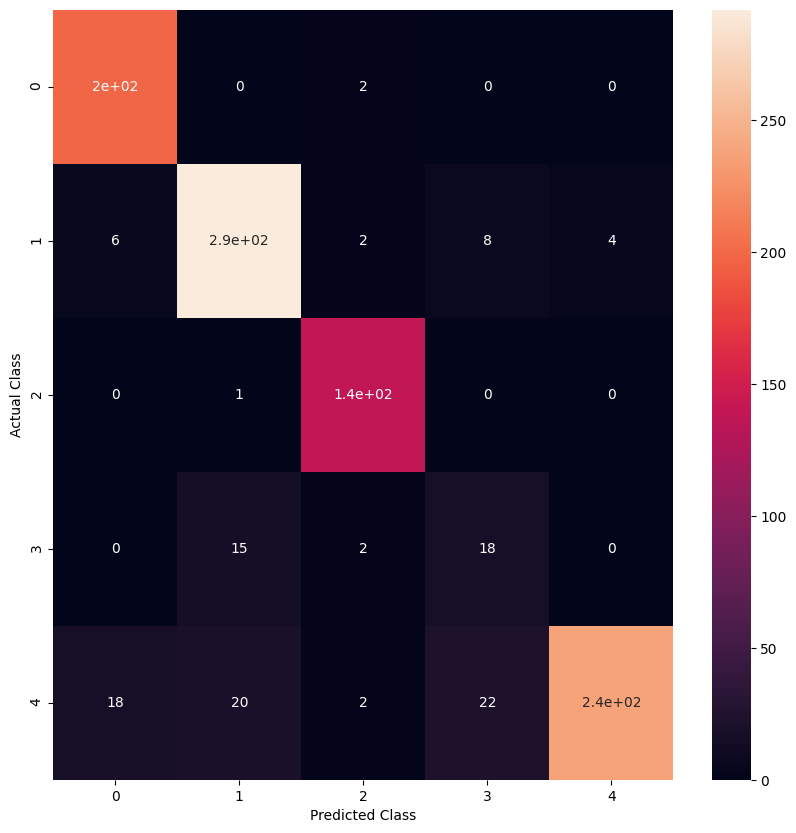

: 

In [77]:
plt.figure(figsize=(10,10))
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()